<a href="https://colab.research.google.com/github/rituparna50/MarsPosition/blob/main/Spatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import astropy

In [3]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, get_body_barycentric, get_body
import astropy.units as u

# Input date and time desired
This is to feed into the program the position of Mars we are interested to find at a certain date and time

In [4]:
date_time = "2023-10-05 09:00:00"
time = Time(date_time)
print(time)

2023-10-05 09:00:00.000


# Calculate position of Mars and Earth
Using get_body_barycentric to calculate positions of Mars and Earth
Barycentric is the center of mass of solar system. "Barycenter" term refers to the center of mass of 2 bodies, that are typically orbiting around each other. It is the point in space between two bodies, which is used by the two spatial bodies to center around while orbiting.

Since larger bodies have higher masses, usually, the barycenter between two objects is closer to the larger body with heavier mass than the smaller body with lesser mass. This is why it is often mistakenly assumed or construed as the small object orbits around the bigger object; wherease both objects orbit and move **around** each other.

[Barycenter of the solar system](https://www.education.com/science-fair/article/barycenter-balancing-point/#:~:text=The%20barycenter%20is%20the%20point,Earth's%20center%20to%20its%20surface.)

## Reason for using Barycentric coordinates

For getting an understanding of relative positions with respect to each other. When we want to find a precise location of the Mars with respect to the position of the Earth, we want to find their position with respect to a standardised center of the solar system, i.e the barycentric mass of the solar system. This is because both Earth and Mars are not fixed and are moving in the solar system. So, to put them on a common scale of barycentric positioning, it is better to gauge the Mars location then with respect to the Earth in the solar system. In this barycentric reference frame, the origin (0, 0, 0) is at the center of mass of the solar system.

In [5]:
with solar_system_ephemeris.set('builtin'):
  mars_bary_position = get_body_barycentric('mars', time)
  earth_bary_position = get_body_barycentric('earth', time)
  print("Mars' position in barycentric system is", mars_bary_position)
  print("Earth's position in barycentric system is", earth_bary_position)

Mars' position in barycentric system is (-1.33303508, -0.81491882, -0.33776089) AU
Earth's position in barycentric system is (0.97156901, 0.18147007, 0.07888759) AU


## But if we used Geocentric coordinates

The geocentric reference frame is a coordinate system where the origin (0, 0, 0) represents the center of mass (geocenter) of the Earth. In this reference frame, the positions of celestial bodies are given relative to the center of mass of the Earth.

In the geocentric reference frame, Earth is at the origin, and positions of other celestial bodies (e.g., the Moon, planets, stars) are described in relation to Earth's center. This reference frame is commonly used for observations and calculations related to objects in the sky as seen from Earth's perspective.

We do not want a geocentric system as that is with respect to the center of the earth. We want heliocentric.

In [6]:
from astropy.coordinates import EarthLocation

#Defining observer's location from the center of the earth -- Geocentric


In [8]:
# Calculate geocentric positions of Mars and Earth
with solar_system_ephemeris.set('builtin'):
    mars_geo_position = get_body('mars', time, location=(0, 0))
    earth_geo_position = get_body('earth', time, location=(0, 0))

# Print geocentric positions
print("Geocentric Position of Mars (x, y, z) in AU:", mars_geo_position.cartesian)
print("Geocentric Position of Earth (x, y, z) in AU:", earth_geo_position.cartesian)

AttributeError: ignored

In [9]:
pip install matplotlib

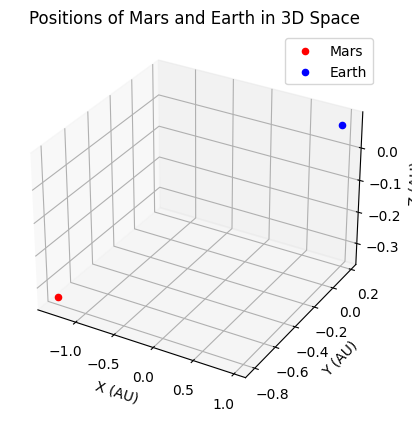

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Positions of Mars and Earth in AU
mars_position = [-1.33303508, -0.81491882, -0.33776089]  # Replace with actual positions
earth_position = [0.97156901, 0.18147007, 0.07888759]  # Replace with actual positions

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the positions of Mars and Earth
ax.scatter(*mars_position, c='r', label='Mars')
ax.scatter(*earth_position, c='b', label='Earth')

# Set labels and title
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title('Positions of Mars and Earth in 3D Space')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Accurate orbital space mapping with skyfield library

Skyfield library is used for more accurate

In [11]:
pip install skyfield

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 24.9 MB/s eta 0:00:00


[#################################] 100% de421.bsp


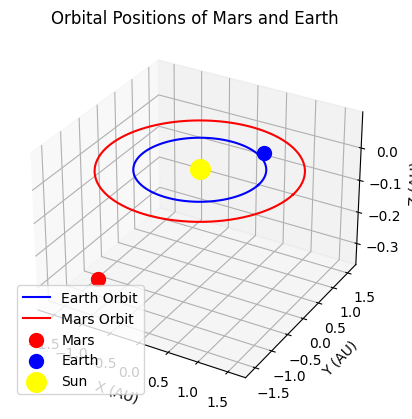

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skyfield.api as sf

# Load Skyfield data
ts = sf.load.timescale()
planets = sf.load('de421.bsp')
earth, mars = planets['earth'], planets['mars']

# Define user-defined time
t = ts.utc(2023, 10, 5, 9, 0, 0)  # Example date: 5th October 2023, 09:00:00 UTC

# Obtain the position of Earth and Mars in AU
earth_position_3d = earth.at(t).position.au
mars_position_3d = mars.at(t).position.au

# Convert to 2D (xy-plane) for the purpose of deriving the angles on their orbits
earth_position_2d = earth_position_3d[0:2]
mars_position_2d = mars_position_3d[0:2]

# Calculate the angles
earth_theta = np.arctan2(earth_position_2d[1], earth_position_2d[0])
mars_theta = np.arctan2(mars_position_2d[1], mars_position_2d[0])

# Orbital radii (approximate, for visualization)
earth_orbit_radius = np.linalg.norm(earth_position_2d)
mars_orbit_radius = np.linalg.norm(mars_position_2d)

# Plot orbits
earth_x = earth_orbit_radius * np.cos(np.linspace(0, 2*np.pi, 100))
earth_y = earth_orbit_radius * np.sin(np.linspace(0, 2*np.pi, 100))
mars_x = mars_orbit_radius * np.cos(np.linspace(0, 2*np.pi, 100))
mars_y = mars_orbit_radius * np.sin(np.linspace(0, 2*np.pi, 100))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the orbits
ax.plot(earth_x, earth_y, 0, label='Earth Orbit', color='blue')
ax.plot(mars_x, mars_y, 0, label='Mars Orbit', color='red')

# Plot the positions of Mars and Earth
ax.scatter(*mars_position_3d, c='red', label='Mars', s=100)
ax.scatter(*earth_position_3d, c='blue', label='Earth', s=100)

# Position of the Sun (center of the solar system)
ax.scatter(0, 0, 0, c='yellow', s=200, label='Sun')

# Set labels and title
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title('Orbital Positions of Mars and Earth')

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Shea cheats and uses Chat GPT! 😃
With some guidance, it produced the following code:



```
from skyfield.api import load, Topos
import math
from datetime import datetime
import numpy as np

def calculate_opening_angle(date_str):
    # Load planetary ephemerides
    planets = load('de421.bsp')
    
    # Get positions of Earth and Mars
    earth, mars = planets['earth'], planets['mars']
    
    # Convert the date string to a datetime object
    date = datetime.strptime(date_str, '%Y-%m-%d')
    
    # Create a Skyfield time object
    ts = load.timescale()
    t = ts.utc(date.year, date.month, date.day)
    
    # Compute positions of Earth and Mars at the specified time
    astrometric_earth = earth.at(t)
    astrometric_mars = mars.at(t)
    
    # Calculate the vector from Earth to Mars
    vector_earth_to_mars = astrometric_mars.position.km - astrometric_earth.position.km
    
    # Calculate the opening angle using the dot product
    angle_radians = math.acos(sum(vector_earth_to_mars * astrometric_earth.position.km) /
                              (np.linalg.norm(vector_earth_to_mars) * np.linalg.norm(astrometric_earth.position.km)))

    # Convert the angle from radians to degrees
    angle_degrees = math.degrees(angle_radians)
    
    return angle_degrees

# Get user input for the date
date_str = input("Enter a date in 'yyyy-mm-dd' format: ")

angle = calculate_opening_angle(date_str)
print(f"Opening angle between Mars and Earth on {date_str}: {angle:.2f} degrees")

#If you want to change the significant digits, you can update the '.2f' value.
#In the code cell below, I have changed it to '.0f' since we shouldn't need to care about precision on a daily basis.
```

---

Make sure to install the libraries needed to run this (Skyfield, datetime and numpy. math should have been installed with python itself).

```pip install skyfield numpy datetime```

---


You can run the code from the command line using:  
```python calculate_opening_angle.py```*

*Note, this assumes the filename of the script is calculate_opening_angle.py



The code will prompt you for a date, formatted as YYYY-MM-DD. Don't enter it as a string or there will be an error (aka no ' ' ).

---



In [13]:
pip install skyfield numpy datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 5.3 MB/s eta 0:00:00


In [14]:
from skyfield.api import load, Topos
import math
from datetime import datetime
import numpy as np

def calculate_opening_angle(date_str):
    # Load planetary ephemerides
    planets = load('de421.bsp')

    # Get positions of Earth and Mars
    earth, mars = planets['earth'], planets['mars']

    # Convert the date string to a datetime object
    date = datetime.strptime(date_str, '%Y-%m-%d')

    # Create a Skyfield time object
    ts = load.timescale()
    t = ts.utc(date.year, date.month, date.day)

    # Compute positions of Earth and Mars at the specified time
    astrometric_earth = earth.at(t)
    astrometric_mars = mars.at(t)

    # Calculate the vector from Earth to Mars
    vector_earth_to_mars = astrometric_mars.position.km - astrometric_earth.position.km

    # Calculate the opening angle using the dot product
    angle_radians = math.acos(sum(vector_earth_to_mars * astrometric_earth.position.km) /
                              (np.linalg.norm(vector_earth_to_mars) * np.linalg.norm(astrometric_earth.position.km)))

    # Convert the angle from radians to degrees
    angle_degrees = math.degrees(angle_radians)

    return angle_degrees

# Get user input for the date
date_str = input("Enter a date in 'yyyy-mm-dd' format: ")

angle = calculate_opening_angle(date_str)
print(f"\n Opening angle between Mars and Earth on {date_str}: {angle:.0f} degrees")


Enter a date in 'yyyy-mm-dd' format: 2023-10-09

 Opening angle between Mars and Earth on 2023-10-09: 168 degrees


Opening angle is the angle between the earth and mars, as seen from the earth.

The angular separation between earth and mars refers to the apparent angle as observed from the earth between the positions of earth and mars in celestial sphere. This angle represents how far apart Earth and Mars appear to be looking up at the sky.


*   Apparent Sky positions - When we observe objects in the night sky, we perceive their positions as they appear to us from our vantage point on Earth. These apparent poositions are different from the actual positions of objects in space.

*   Angular Separation - This is the angle between two objects in the sky. It tells us how much spce there is between the two objects as we see them from Earth.

*   Changing Separation - Because earth and mars both orbit the sun, their positions in the night sky change over time. Sometimes they appear closer togeether (small angular separation) and at other times they appear farther apart (large annular separation0.

*   Astronomical Significance - The angular separation between celestial bjects is important. It determines planetary conjunctions (when two planets appear close together in the sky) and oppostions (when a planet is opposite the Sun and appears the brightest). Astronomores use angular separations to preidct and observe various celestial events.



